## AB Testing for new web design to test if user clicks special loan opportunity botton on webpage more frequently





### Sample data ready for use

In [1]:
import pandas as pd
import numpy as np



In [2]:
data=pd.read_excel('AB TESTING DATA.xlsx')

In [3]:
data

,ID,Date,Version,New Page Click
0,306,11/22/2022,New,no
1,102,12/12/2022,Old,yes
2,185,12/4/2022,Old,no
3,7,2/7/2022,Old,no
4,80,9/18/2022,Old,no
...,...,...,...,...
578,365,9/1/2022,Old,yes
579,374,10/8/2022,New,no
580,40,12/8/2022,Old,no
581,207,7/3/2022,Old,yes


## First, I will gather probabilities

In [4]:
## finding total number of web participants
total=len(data)

In [5]:
total

583

In [6]:
old_v=data[data['Version']=='Old']

In [7]:
len(old_v)

292

In [8]:
new_v=data[data['Version']=='New']

In [9]:
len(new_v)

291

# Checkpoint:
## Total viewers:583
## Old version: 292
## New Version:291

In [10]:

## finding the total number of 'yes' selection in the entire dataset(New and Old)

tot_yes=len(data[data['New Page Click']=='yes'])

tot_yes


281

In [11]:
## finding the total number of 'yes' selection in Old version data

old_yes=len(old_v[data['New Page Click']=='yes'])

old_yes




<ipython-input-11-fc27dcd7c2f8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  old_yes=len(old_v[data['New Page Click']=='yes'])


149

In [12]:
## finding the total number of 'yes' selection in new version data

new_yes=len(new_v[data['New Page Click']=='yes'])

new_yes

<ipython-input-12-f6ddc783c5b0>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_yes=len(new_v[data['New Page Click']=='yes'])


132

In [13]:
## probabilty old
old_prob=len(old_v)/total
old_prob

0.5008576329331046

In [14]:
## probability of new
new_prob=len(new_v)/total
new_prob

0.49914236706689535

In [15]:
actual_diff=new_prob-old_prob
actual_diff

-0.0017152658662092368

# Hypothesis testing

## Trying to understand whether the new version is statistically better than the old
## Null Hyp: N(new)-N(old)<=0
## Alt Hyp: N(new)-N(old)>0

#### Type one error rate of 5%

In [16]:
mock_old=np.random.choice([0,1], size=len(old_v), replace=True, p=(old_prob, 1-old_prob))
mock_old.mean()                                                         
                                                              

0.4383561643835616

In [17]:
mock_new=np.random.choice([0,1], size=len(new_v), replace=True, p=(new_prob, 1-new_prob))
mock_new.mean() 

0.5189003436426117

In [18]:
diff=mock_new.mean()-mock_old.mean()

In [19]:
diff

0.08054417925905011

In [20]:
## caclulating the difference conversion rate throguh mass interations
empty=[]
for i in range(10000):
    mock_old=np.random.choice([0,1], size=len(old_v), replace=True, p=(old_prob, 1-old_prob))
    mock_new=np.random.choice([0,1], size=len(new_v), replace=True, p=(new_prob, 1-new_prob))
    diff=mock_new.mean()-mock_old.mean()
    empty.append(diff)
full=np.array(empty)
    

In [21]:
full

array([ 0.0085793 ,  0.05666573,  0.00175352, ...,  0.04294356,
       -0.03598833, -0.0085793 ])

In [22]:
import matplotlib.pyplot as plt

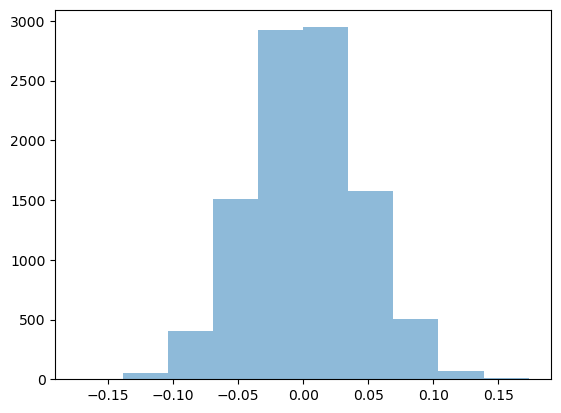

In [23]:
plt.hist(full,alpha=0.5)
plt.show()

In [24]:
##proportion of mock data difference that is greater thn actual data
null_vals=np.random.normal(0,full.std(),full.size)
null_vals

array([ 0.00618468,  0.00587853,  0.05765734, ...,  0.08027209,
        0.12212723, -0.01503882])

In [25]:
p_value=(null_vals-full).mean()

In [26]:
p_value

-0.0006893411529683959

https://statisticsbyjim.com/hypothesis-testing/reproducibility-p-values/

https://statisticsbyjim.com/hypothesis-testing/types-errors-hypothesis-testing/

https://seeing-theory.brown.edu

reject the null hypothesis that the new page is equal or better than the old webpage.

In [44]:
## additional practice


In [45]:
from scipy import stats

In [46]:
def significant(first, second, alpha=0.05):
    t,p = stats.ttest_ind(first,second, equal_var=False)
    return p<alpha, p

In [47]:
def exp_cont(data, var_name, alpha=0.05):
    exp=data[data['New Page Click'] ==0][var_name]
    cont=data[data['New Page Click'] ==1][var_name]    
    return significant(exp, cont, alpha)

In [48]:
significant(old_v['New Page Click'],new_v['New Page Click'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'